EDA ON GRUG USAGE

#drugName (categorical): name of drug
#condition (categorical): name of condition
#review (text): patient review
#rating (numerical): 10 star patient rating
#date (date): date of review entry
#usefulCount (numerical): number of users who found review useful

In [1]:

# Load EDA Pkgs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from textblob import TextBlob

#How many drugs do we have?
#What is the most popular drug?
#What are the groups/classification of drugs used?
#Which Drug has the best review?
#The number of drugs per condition
#Number of patients that searched on a particular drug

In [5]:
# Load Dataset
df = pd.read_csv(r"C:\Users\CAPTP\Downloads\drugsCom_raw\drugsComTrain_raw.tsv",sep='\t')

In [6]:
# Preview Dataset
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [7]:

# Columns
df.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [8]:
# Missing Values
df.isnull().sum()


Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [9]:

# How many drugs do we have?
df['drugName'].unique().tolist()

['Valsartan',
 'Guanfacine',
 'Lybrel',
 'Ortho Evra',
 'Buprenorphine / naloxone',
 'Cialis',
 'Levonorgestrel',
 'Aripiprazole',
 'Keppra',
 'Ethinyl estradiol / levonorgestrel',
 'Topiramate',
 'L-methylfolate',
 'Pentasa',
 'Dextromethorphan',
 'Nexplanon',
 'Liraglutide',
 'Trimethoprim',
 'Amitriptyline',
 'Lamotrigine',
 'Nilotinib',
 'Atripla',
 'Trazodone',
 'Etonogestrel',
 'Etanercept',
 'Tioconazole',
 'Azithromycin',
 'Eflornithine',
 'Daytrana',
 'Ativan',
 'Imitrex',
 'Sertraline',
 'Toradol',
 'Viberzi',
 'Mobic',
 'Dulcolax',
 'Morphine',
 'MoviPrep',
 'Trilafon',
 'Fluconazole',
 'Contrave',
 'Clonazepam',
 'Metaxalone',
 'Venlafaxine',
 'Ledipasvir / sofosbuvir',
 'Symbyax',
 'Tamsulosin',
 'Doxycycline',
 'Dulaglutide',
 'Intuniv',
 'Buprenorphine',
 'Qvar',
 'Opdivo',
 'Pyridium',
 'Latuda',
 'Bupropion',
 'Implanon',
 'Effexor XR',
 'Drospirenone / ethinyl estradiol',
 'NuvaRing',
 'Prepopik',
 'Tretinoin',
 'Gildess Fe 1 / 20',
 'Ethinyl estradiol / norgestimate'

In [10]:
# How many drugs do we have?
len(df['drugName'].unique().tolist())

3436

In [11]:
# What is the most popular drug?
df['drugName'].value_counts()

Levonorgestrel                       3657
Etonogestrel                         3336
Ethinyl estradiol / norethindrone    2850
Nexplanon                            2156
Ethinyl estradiol / norgestimate     2117
                                     ... 
Dynacin                                 1
Histrelin                               1
Inulin                                  1
Epogen                                  1
Tandem DHA                              1
Name: drugName, Length: 3436, dtype: int64

In [12]:
# What is the most popular drug?
# Top 20 Drugs (Most Popular)
df['drugName'].value_counts().nlargest(20)

Levonorgestrel                        3657
Etonogestrel                          3336
Ethinyl estradiol / norethindrone     2850
Nexplanon                             2156
Ethinyl estradiol / norgestimate      2117
Ethinyl estradiol / levonorgestrel    1888
Phentermine                           1543
Sertraline                            1360
Escitalopram                          1292
Mirena                                1242
Implanon                              1102
Gabapentin                            1047
Bupropion                             1022
Venlafaxine                           1016
Miconazole                            1000
Citalopram                             995
Medroxyprogesterone                    995
Lexapro                                952
Bupropion / naltrexone                 950
Duloxetine                             934
Name: drugName, dtype: int64

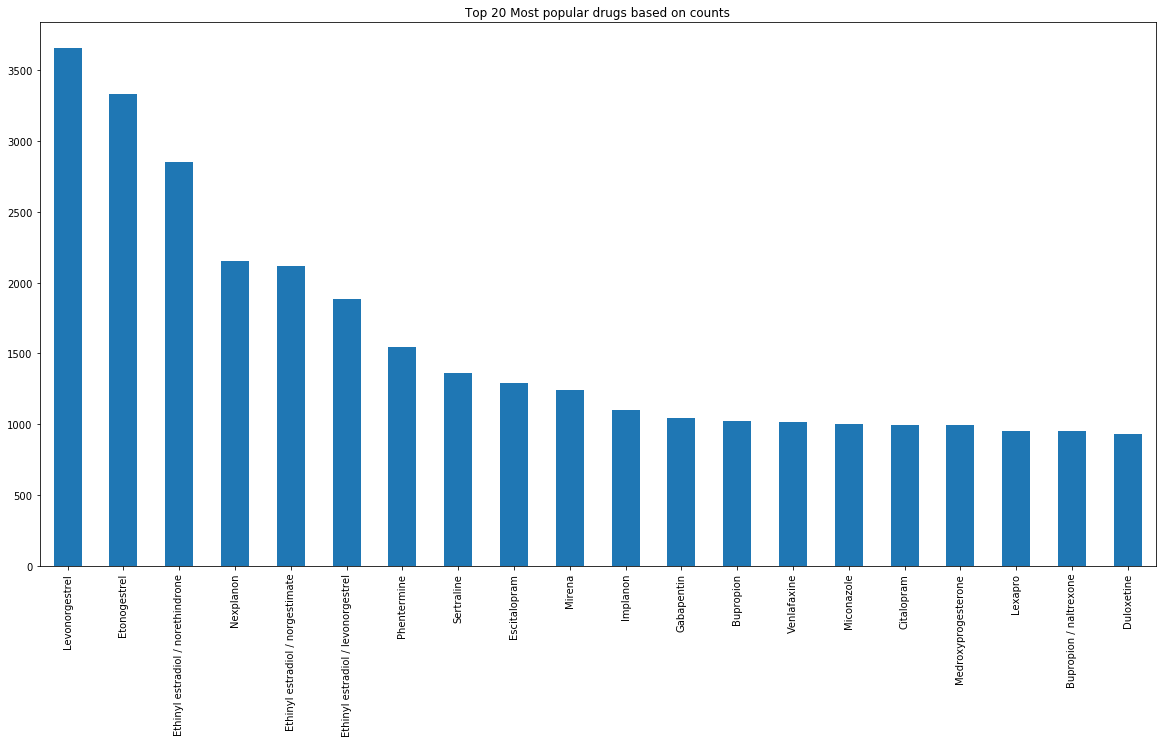

In [13]:

# Top 20 Drugs (Most Popular)
plt.figure(figsize=(20,10))
df['drugName'].value_counts().nlargest(20).plot(kind='bar')
plt.title("Top 20 Most popular drugs based on counts")
plt.show()

In [14]:
# Least 20 Drugs (Most Popular)
df['drugName'].value_counts().nsmallest(20)

Philith                                                                   1
Cyclopentolate                                                            1
Dextrostat                                                                1
Senna S                                                                   1
Wera                                                                      1
Gilotrif                                                                  1
Attapulgite                                                               1
Mucinex Sinus-Max Full Force                                              1
Apomorphine                                                               1
Alka-Seltzer Plus Cold Formula Sparkling Original Effervescent Tablets    1
Aldomet                                                                   1
Carfilzomib                                                               1
Simbrinza                                                                 1
Aspirin / ch

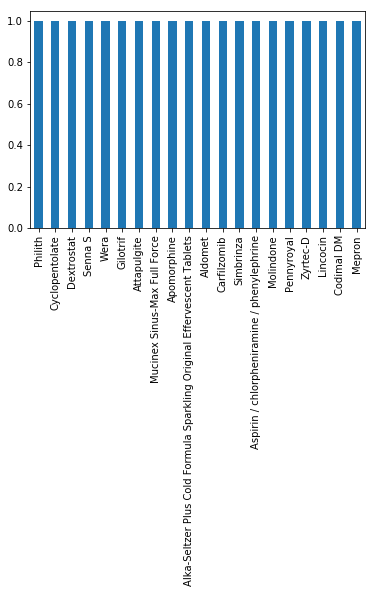

In [15]:
df['drugName'].value_counts().nsmallest(20).plot(kind='bar')

In [23]:
drug_suffix = {"azole":"antifungal (except metronidazole)",
"caine":"anesthetic",
"cillin":"antibiotic(penicillins)",
"mycin":"antibiotic",
"micin":"antibiotic",
"cycline":"antibiotic",
"oxacin":"antibiotic",
"ceph":"antibiotic(cephalosporins)",
"cef":"antibiotic (cephalosporins)",
"dine":"h2 blockers (anti-ulcers)",
"done":"opiod analgesics",
"ide":"oral hypoglycemics",
"lam":"anti-anxiety",
"pam":"anti-anxiety",
"mide":"diuretics",
"zide":"diuretics",
"nium":"neuromuscular blocking agents",
"olol":"beta blockers",
"tidine":"h2 antagonist",
"tropin":"pituitary hormone",
"zosin":"alpha blocker",
"ase":"thrombolytics",
"plase":"thrombolytics",
"azepam":"anti-anziety(benzodiazepine)",
"azine":"antipyschotics (phenothiazine)",
"barbital":"barbiturate",
"dipine":"calcium channel blocker",
"lol":"beta blocker",
"zolam":"cns depressants",
"pril":"ace inhibitor",
"artan":"arb blocker",
"statins":"lipid-lowering drugs",
"parin":"anticoagulants",
"sone":"corticosteroid (prednisone)"}

In [24]:
def classify_drug(drugname):
    for i in drug_suffix.keys():
        if drugname.endswith(i):
            print(True)
            print(drug_suffix[i])

In [25]:

classify_drug('Valsartan')

True
arb blocker


In [26]:
classify_drug('losartan')

True
arb blocker


In [27]:
def classify_drug(drugname):
    for i in drug_suffix.keys():
        if drugname.endswith(i):
            return drug_suffix[i]

In [28]:
classify_drug('valsartan')

'arb blocker'

In [30]:
df['drug_class'] = df['drugName'].apply(classify_drug)

In [31]:
df[['drugName','drug_class']]

,drugName,drug_class
0,Valsartan,arb blocker
1,Guanfacine,None
2,Lybrel,None
3,Ortho Evra,None
4,Buprenorphine / naloxone,None
...,...,...
161292,Campral,None
161293,Metoclopramide,oral hypoglycemics
161294,Orencia,None
161295,Thyroid desiccated,None


In [32]:
# How many Groups of Drugs By Class
df['drug_class'].unique().tolist()

['arb blocker',
 None,
 'antifungal (except metronidazole)',
 'oral hypoglycemics',
 'opiod analgesics',
 'antibiotic',
 'anti-anxiety',
 'h2 blockers (anti-ulcers)',
 'beta blockers',
 'ace inhibitor',
 'thrombolytics',
 'alpha blocker',
 'corticosteroid (prednisone)',
 'antipyschotics (phenothiazine)',
 'antibiotic(penicillins)',
 'barbiturate',
 'calcium channel blocker',
 'anesthetic',
 'pituitary hormone',
 'antibiotic (cephalosporins)',
 'beta blocker',
 'neuromuscular blocking agents',
 'anticoagulants']

In [37]:
# Which of class of drug  is the most commonest

In [36]:
df['drug_class'].value_counts()

antifungal (except metronidazole)    4201
opiod analgesics                     3945
oral hypoglycemics                   3555
antibiotic                           3401
anti-anxiety                         2645
h2 blockers (anti-ulcers)            1228
beta blockers                         966
corticosteroid (prednisone)           886
antipyschotics (phenothiazine)        664
arb blocker                           560
ace inhibitor                         432
calcium channel blocker               233
alpha blocker                         153
anesthetic                            129
antibiotic(penicillins)               119
thrombolytics                         116
beta blocker                           97
neuromuscular blocking agents          45
antibiotic (cephalosporins)            29
pituitary hormone                      28
barbiturate                            19
anticoagulants                          9
Name: drug_class, dtype: int64

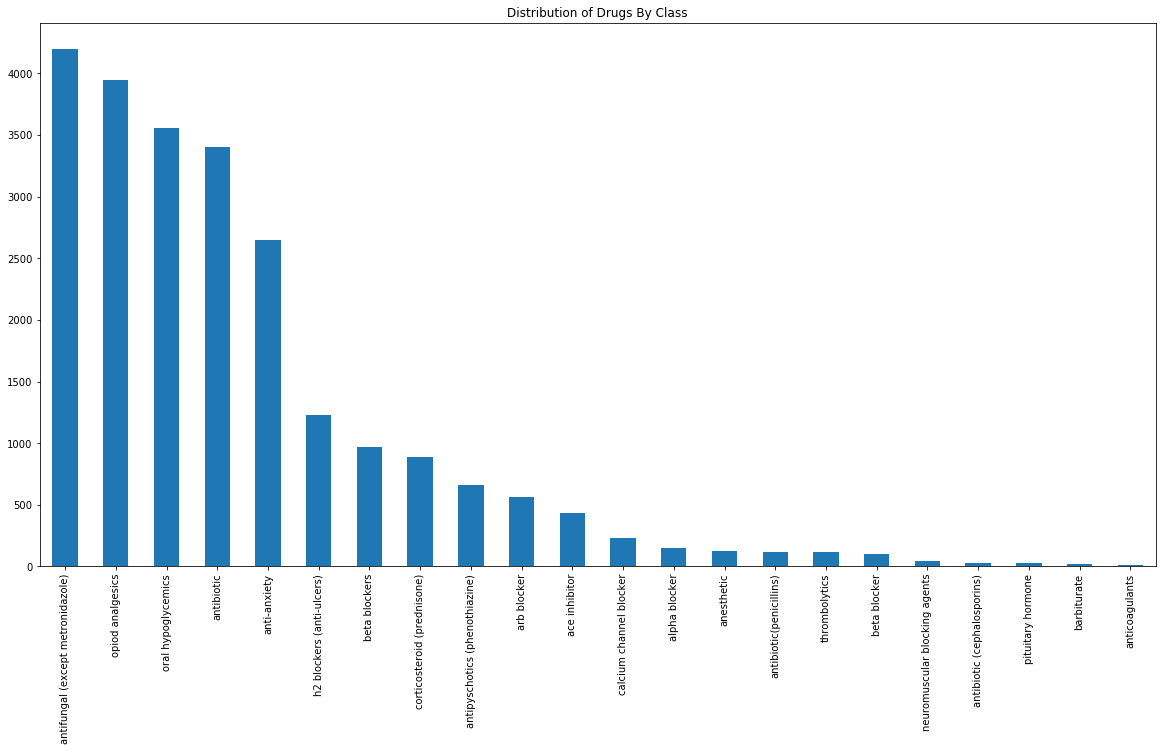

In [38]:

# Which of class of drug  is the most commonest
plt.figure(figsize=(20,10))
df['drug_class'].value_counts().plot(kind='bar')
plt.title("Distribution of Drugs By Class")
plt.show()

In [39]:
# Distribution of Drugs Per Drug Group based on size
drug_groups = df.groupby('drug_class').size()

In [40]:
type(drug_groups)

pandas.core.series.Series

In [41]:
# Convert to DF
drug_groups.to_frame()

,0
drug_class,
ace inhibitor,432
alpha blocker,153
anesthetic,129
anti-anxiety,2645
antibiotic,3401
antibiotic (cephalosporins),29
antibiotic(penicillins),119
anticoagulants,9
antifungal (except metronidazole),4201


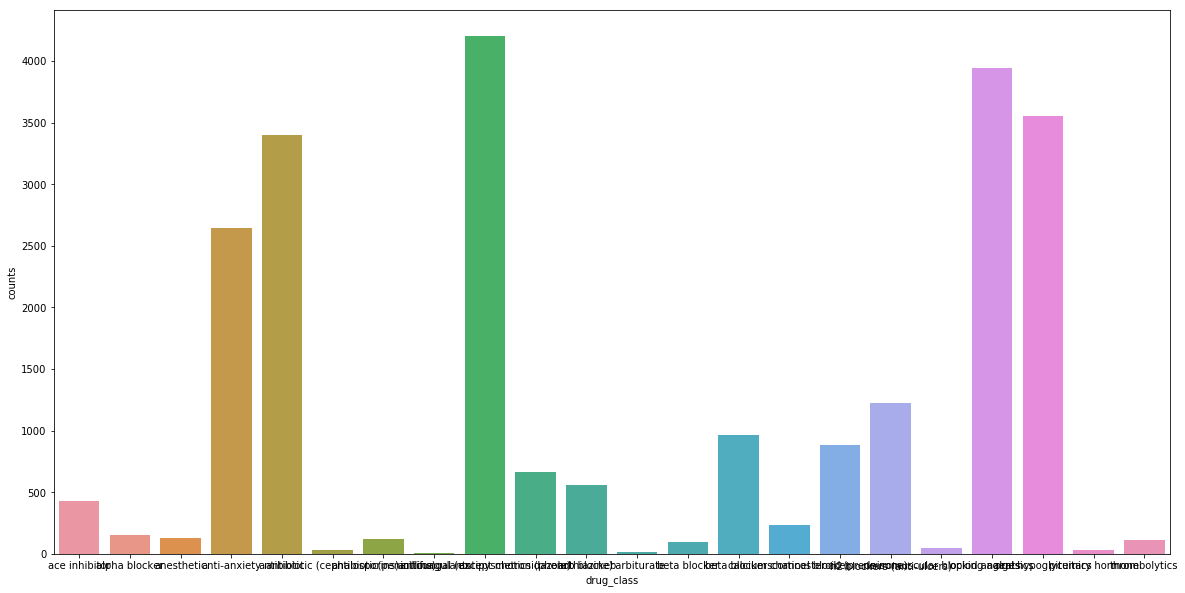

In [44]:
drug_groups_df = pd.DataFrame({'drug_class':drug_groups.index,'counts':drug_groups.values})
plt.figure(figsize=(20,10))
g = sns.barplot(data=drug_groups_df,x='drug_class',y='counts')
plt.show()

### Question on Conditions
+ How many conditions are there?
+ Which conditions are the most common?
+ Distribution of conditions and rating

In [47]:
# Number of Conditions
df['condition'].unique()

array(['Left Ventricular Dysfunction', 'ADHD', 'Birth Control',
       'Opiate Dependence', 'Benign Prostatic Hyperplasia',
       'Emergency Contraception', 'Bipolar Disorde', 'Epilepsy',
       'Migraine Prevention', 'Depression', "Crohn's Disease", 'Cough',
       'Obesity', 'Urinary Tract Infection', 'ibromyalgia',
       'Chronic Myelogenous Leukemia', 'HIV Infection', 'Insomnia',
       'Rheumatoid Arthritis', 'Vaginal Yeast Infection',
       'Chlamydia Infection', 'Hirsutism', 'Panic Disorde', 'Migraine',
       nan, 'Pain', 'Irritable Bowel Syndrome', 'Osteoarthritis',
       'Constipation', 'Bowel Preparation', 'Psychosis', 'Muscle Spasm',
       'Hepatitis C', 'Overactive Bladde', 'Diabetes, Type 2',
       'Asthma, Maintenance', 'Non-Small Cell Lung Cance',
       'Schizophrenia', 'Dysuria', 'Smoking Cessation', 'Anxiety', 'Acne',
       'emale Infertility', 'Constipation, Acute',
       'Constipation, Drug Induced', 'Erectile Dysfunction',
       'Trigeminal Neuralgia', 'U

In [48]:
len(df['condition'].unique().tolist())

885

In [49]:
# Average Rating of Drugs
avg_rating = (df['rating'].groupby(df['drugName']).mean())

In [50]:
avg_rating

drugName
A + D Cracked Skin Relief               10.000000
A / B Otic                              10.000000
Abacavir / dolutegravir / lamivudine     8.211538
Abacavir / lamivudine / zidovudine       9.000000
Abatacept                                7.157895
                                          ...    
Zyvox                                    9.000000
ZzzQuil                                  2.500000
depo-subQ provera 104                    1.000000
ella                                     6.980392
femhrt                                   4.000000
Name: rating, Length: 3436, dtype: float64

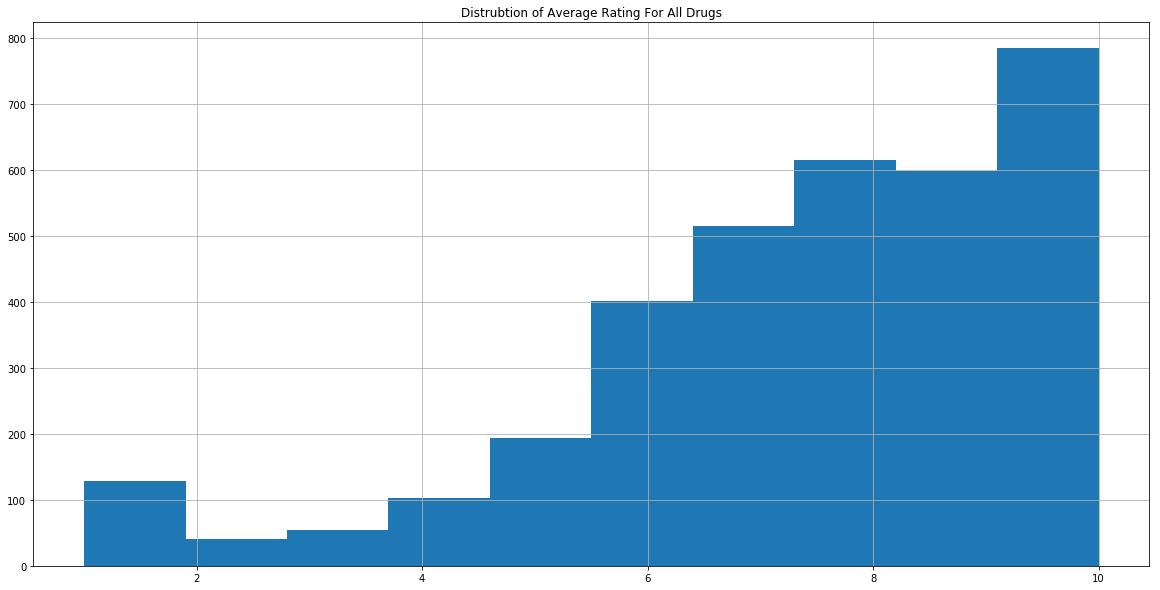

In [51]:
# Average Rating For All Drugs
plt.figure(figsize=(20,10))
avg_rating.hist()
plt.title("Distrubtion of Average Rating For All Drugs")
plt.show()

In [52]:
# Average Rating of Drugs By Class
avg_rating_per_drug_class = (df['rating'].groupby(df['drug_class']).mean())

In [53]:
avg_rating_per_drug_class

drug_class
ace inhibitor                        5.759259
alpha blocker                        6.954248
anesthetic                           5.937984
anti-anxiety                         8.543667
antibiotic                           6.500735
antibiotic (cephalosporins)          6.344828
antibiotic(penicillins)              7.033613
anticoagulants                       9.222222
antifungal (except metronidazole)    5.580100
antipyschotics (phenothiazine)       7.146084
arb blocker                          6.464286
barbiturate                          8.894737
beta blocker                         6.587629
beta blockers                        7.681159
calcium channel blocker              5.725322
corticosteroid (prednisone)          7.477427
h2 blockers (anti-ulcers)            7.280945
neuromuscular blocking agents        8.622222
opiod analgesics                     7.446388
oral hypoglycemics                   7.268917
pituitary hormone                    8.500000
thrombolytics          

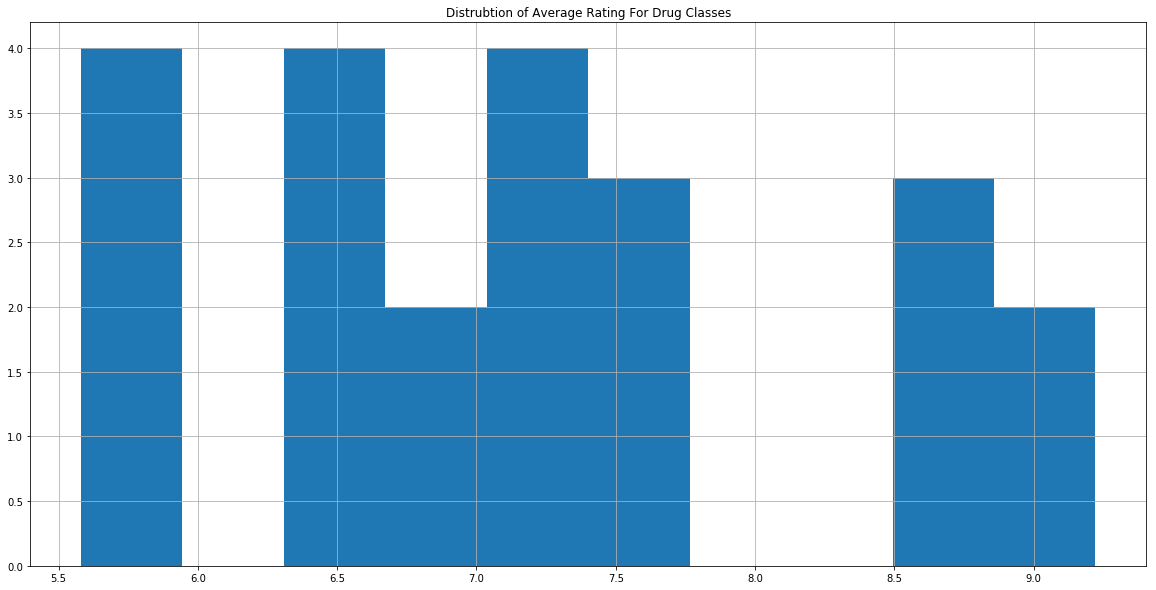

In [54]:

# Average Rating For All Drugs
plt.figure(figsize=(20,10))
avg_rating_per_drug_class.hist()
plt.title("Distrubtion of Average Rating For Drug Classes")
plt.show()

In [55]:

# Which Group of Drugs have the higest mean/average rating
avg_rating_per_drug_class.nlargest(20)

drug_class
anticoagulants                    9.222222
barbiturate                       8.894737
neuromuscular blocking agents     8.622222
anti-anxiety                      8.543667
pituitary hormone                 8.500000
beta blockers                     7.681159
corticosteroid (prednisone)       7.477427
opiod analgesics                  7.446388
h2 blockers (anti-ulcers)         7.280945
oral hypoglycemics                7.268917
antipyschotics (phenothiazine)    7.146084
thrombolytics                     7.103448
antibiotic(penicillins)           7.033613
alpha blocker                     6.954248
beta blocker                      6.587629
antibiotic                        6.500735
arb blocker                       6.464286
antibiotic (cephalosporins)       6.344828
anesthetic                        5.937984
ace inhibitor                     5.759259
Name: rating, dtype: float64

In [56]:

# Which Drugs have the higest mean/average rating
avg_rating.nlargest(20)

drugName
A + D Cracked Skin Relief                              10.0
A / B Otic                                             10.0
Absorbine Jr.                                          10.0
Accolate                                               10.0
Acetaminophen / caffeine / magnesium salicylate        10.0
Acetaminophen / dextromethorphan / doxylamine          10.0
Acetaminophen / phenylephrine                          10.0
Acetaminophen / pseudoephedrine                        10.0
Acetic acid / antipyrine / benzocaine / polycosanol    10.0
Acrivastine / pseudoephedrine                          10.0
Acyclovir / hydrocortisone                             10.0
Advil Cold and Sinus Liqui-Gels                        10.0
Aerobid-M                                              10.0
Afrin 4 Hour Extra Moisturizing                        10.0
Ala-Quin                                               10.0
Alavert                                                10.0
Aldactazide                    

#### Questions on UsefulCount
+ number of users who found review useful
+  Top UsefulCount By Drugs/Class
+ Best drugs based usefulcount

In [58]:
df.groupby('drugName')['usefulCount'].value_counts()

drugName                              usefulCount
A + D Cracked Skin Relief             6              1
A / B Otic                            20             1
Abacavir / dolutegravir / lamivudine  9              6
                                      1              5
                                      12             5
                                                    ..
ella                                  32             1
                                      42             1
femhrt                                0              1
                                      2              1
                                      42             1
Name: usefulCount, Length: 54324, dtype: int64

In [59]:
# Top Drugs Per UsefulCount
df.groupby('drugName')['usefulCount'].nunique().nlargest(20)

drugName
Fluoxetine       181
Gabapentin       181
Bupropion        177
Citalopram       176
Sertraline       172
Escitalopram     171
Prozac           171
Zoloft           171
Lexapro          169
Celexa           166
Amitriptyline    162
Lorcaserin       157
Trazodone        157
Duloxetine       153
Phentermine      150
Belviq           148
Alprazolam       146
Cymbalta         144
Venlafaxine      144
BuSpar           141
Name: usefulCount, dtype: int64

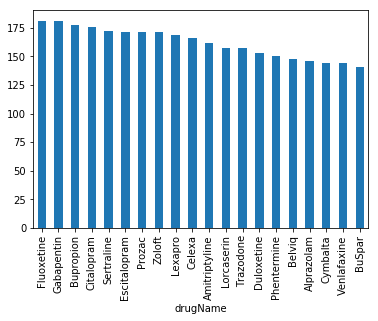

In [60]:
# Top Drugs Per UsefulCount
df.groupby('drugName')['usefulCount'].nunique().nlargest(20).plot(kind='bar')


In [61]:
# Top Drugs Class Per UsefulCount
df.groupby('drug_class')['usefulCount'].nunique().nlargest(20)

drug_class
opiod analgesics                     212
anti-anxiety                         198
oral hypoglycemics                   157
h2 blockers (anti-ulcers)            147
antifungal (except metronidazole)    139
arb blocker                          129
beta blockers                        123
antibiotic                           118
ace inhibitor                        111
calcium channel blocker              108
corticosteroid (prednisone)           97
antipyschotics (phenothiazine)        95
alpha blocker                         73
beta blocker                          65
antibiotic(penicillins)               60
thrombolytics                         59
anesthetic                            47
neuromuscular blocking agents         37
antibiotic (cephalosporins)           20
barbiturate                           16
Name: usefulCount, dtype: int64

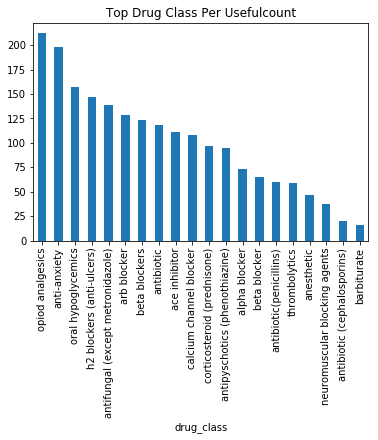

In [62]:
# Top Drugs Class Per UsefulCount
df.groupby('drug_class')['usefulCount'].nunique().nlargest(20).plot(kind='bar')
plt.title("Top Drug Class Per Usefulcount")
plt.show()

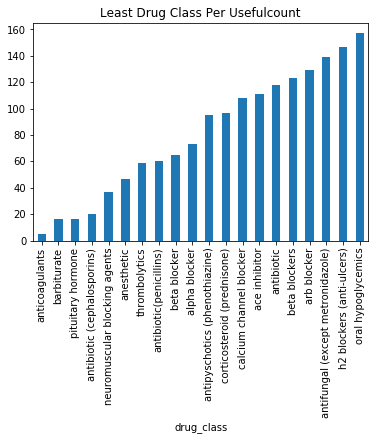

In [63]:
# Top Drugs Class Per UsefulCount
df.groupby('drug_class')['usefulCount'].nunique().nsmallest(20).plot(kind='bar')
plt.title("Least Drug Class Per Usefulcount")
plt.show()

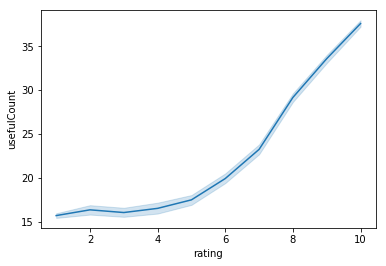

In [64]:
### Correlation between Rating and Usefulcount
sns.lineplot(data=df,x='rating',y='usefulCount')

In [66]:
# Save Dataset
df.to_csv("drug_review_dataset_with_sentiment.csv",index=False)



In [67]:
#sidharth manoj
#ra1911028010091
#sm1969@srmist.edu.in
#j1-cloud computing